# Downloading the dataset

### Automatic installation:

1. Download kaggle api token
   - Go to https://www.kaggle.com/settings/account and scroll until you see 'Create New Token'
2. Move kaggle.json to ~/.kaggle
   - Run command `mv kaggle.json ~/.kaggle && chmod 600 ~/.kaggle/kaggle.json`
3. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition

### Manual installation:

1. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition
2. Download dataset
3. Unzip and move contents to `./data` directory


In [1]:
import os

DATA_DIR = './data'
COMPETITION_NAME = 'widsdatathon2025'

if not os.path.isdir(DATA_DIR):
    import kaggle
    import zipfile

    kaggle.api.authenticate()
    kaggle.api.competition_download_files(competition=COMPETITION_NAME)
    
    zip_path = f'{COMPETITION_NAME}.zip'
    with zipfile.ZipFile(zip_path, 'r') as zip:
        zip.extractall(DATA_DIR)
    os.remove(zip_path)

# Data exploration
### Importing data and viewing some tables
Importing the .xlsx and .csv training data and testing data into pandas dataframes and analyzing their shapes and structures.

In [109]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TRAIN_DIR = DATA_DIR + '/TRAIN_NEW'
TEST_DIR = DATA_DIR + '/TEST'

categorical_df = pd.read_excel(TRAIN_DIR + '/TRAIN_CATEGORICAL_METADATA_new.xlsx')
quantitative_df = pd.read_excel(TRAIN_DIR + '/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
connectome_df = pd.read_csv(TRAIN_DIR + '/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
solutions_df = pd.read_excel(TRAIN_DIR + '/TRAINING_SOLUTIONS.xlsx')

categorical_df_test = pd.read_excel(TEST_DIR + '/TEST_CATEGORICAL.xlsx')
quantitative_df_test = pd.read_excel(TEST_DIR + '/TEST_QUANTITATIVE_METADATA.xlsx')
connectome_df_test = pd.read_csv(TEST_DIR + '/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')

with open("categorical_labels.json", "r") as file:
    categorical_labels = json.load(file)

# json cant store keys of type int, cast int keys back to int
categorical_labels = {category: {int(key): label for key, label in mapping.items()} for category, mapping in categorical_labels.items()}

print("Training categorical metadata:\n")
categorical_df

Training categorical metadata:



,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,2019,4,1.0,1.0,3.0,12.0,NaN,15.0,5.0
1209,zwXD5v17Rx01,2018,1,0.0,0.0,3.0,21.0,40.0,21.0,40.0
1210,zWzLCi3NTBTd,2018,3,2.0,3.0,3.0,21.0,40.0,21.0,35.0
1211,Zy9GTHDxUbXU,2019,4,0.0,1.0,3.0,18.0,35.0,18.0,45.0


In [111]:
solutions_df

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


In [113]:
print("Training quantitative metadata:\n")
quantitative_df

Training quantitative metadata:



,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,5.0,13.0,5.0,8.0,7.0,2.0,8.0,11.272986
1209,zwXD5v17Rx01,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,7.0,7.364020
1210,zWzLCi3NTBTd,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,3.0,9.0,3.0,7.0,5.0,2.0,9.0,9.962126
1211,Zy9GTHDxUbXU,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,0.0,8.0,5.0,7.0,2.0,2.0,7.0,NaN


In [115]:
print("Functional connectome matrices:\n")
connectome_df

Functional connectome matrices:



,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,9gpepMI9sj5q,0.265284,0.551726,0.628318,0.647700,0.710757,0.132334,0.326207,0.354319,0.531170,...,0.127097,0.129787,0.298987,0.114577,0.534109,0.118893,0.181292,0.181055,0.238357,0.577009
1209,FIDen5rdMc0v,-0.018377,0.576689,0.527451,0.327463,0.586868,0.573689,0.300544,0.301103,0.659840,...,0.482214,-0.159587,-0.162498,-0.093249,0.309914,0.143818,0.218337,0.389331,0.328741,0.238443
1210,dlsMC4TXL4e8,0.227028,0.405659,0.023545,-0.093085,-0.068960,0.647574,0.762552,0.465109,0.199337,...,-0.379304,0.126976,0.193695,0.214483,0.429836,0.302141,0.104774,0.856375,0.303248,0.363639
1211,syeyZjEx8FUx,0.189849,0.752876,0.842463,0.817037,0.820196,0.792950,0.650929,0.488504,0.580207,...,-0.212254,-0.055539,-0.221935,-0.202464,0.602651,0.482066,0.399363,0.373746,0.279900,0.684434


### Verifying amount of samples/individuals in testing and training data

In [118]:
print("Number of individuals in training data: ", len(categorical_df))
print("Number of individuals in testing data: ", len(categorical_df_test))

Number of individuals in training data:  1213
Number of individuals in testing data:  304


### Taking a deeper look into the quantitative/qualitative data

The categorical data is listed as ints in the metadata, but these ints are considered categorical. Here we look at their values and all potential options for a category.

In [122]:
#print(categorical_labels)
for key, values in categorical_labels.items():
    print(key)  # category label
    print(values)  # options for category

ADHD_Outcome
{0: 'Other/None', 1: 'ADHD'}
Sex_F
{0: 'Male', 1: 'Female'}
Basic_Demos_Study_Site
{1: 'Staten Island', 2: 'MRV', 3: 'Midtown', 4: 'Harlem', 5: 'SI RUMC'}
PreInt_Demos_Fam_Child_Ethnicity
{0: 'Not Hispanic or Latino', 1: 'Hispanic or Latino', 2: 'Decline to specify', 3: 'Unknown'}
PreInt_Demos_Fam_Child_Race
{0: 'White/Caucasian', 1: 'Black/African American', 2: 'Hispanic', 3: 'Asian', 4: 'Indian', 5: 'Native American Indian', 6: 'American Indian/Alaskan Native', 7: 'Native Hawaiian/Other Pacific Islander', 8: 'Two or more races', 9: 'Other race', 10: 'Unknown', 11: 'Choose not to specify'}
MRI_Track_Scan_Location
{1: 'Staten Island', 2: 'RUBIC', 3: 'CBIC', 4: 'CUNY'}
Barratt_Edu
{3: 'Less than 7th grade', 6: 'Junior high/Middle school (9th grade)', 9: 'Partial high school (10th or 11th grade)', 12: 'High school graduate', 15: 'Partial college (at least one year)', 18: 'College education', 21: 'Graduate degree'}
Barratt_Occ
{0: 'Homemaker, stay at home parent.', 5: 'Day la

### Targets

Analyzing our target variables, ADHD_Outcome (Other/None, ADHD), and Sex_F (Male, Female). There are clear class imbalances and biases here, as there is more data for individuals with ADHD and more individuals that are male. This makes sense given that the families that participated in this research were more inclined to because of their child's likely ADHD diagnosis, and it is more commonly identified in males.
Another thing we want to make note of right away is the proportion of males and females. There seem to be more true cases of ADHD in males here, probably because more males than females participated in the study.

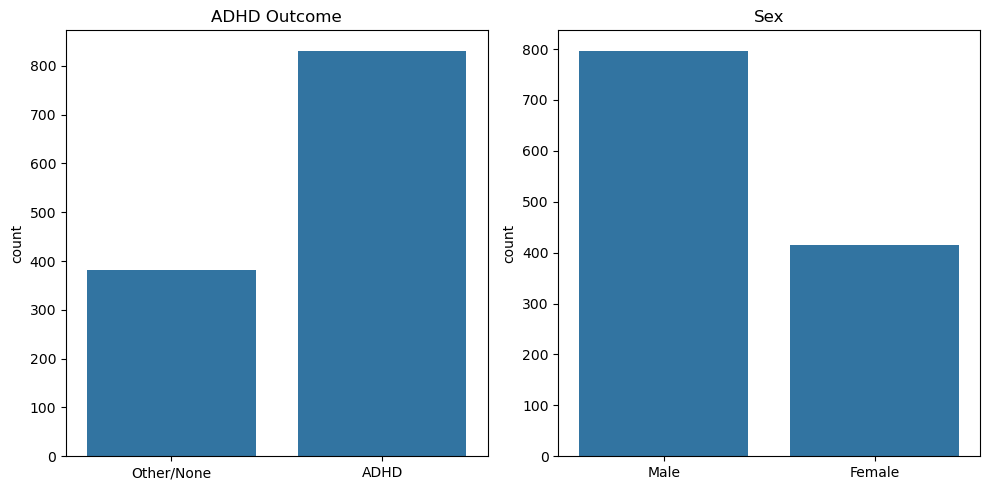

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title("ADHD Outcome")
sns.countplot(x='ADHD_Outcome', data=solutions_df, ax=ax)
labels = categorical_labels['ADHD_Outcome'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title("Sex")
sns.countplot(x='Sex_F', data=solutions_df, ax=ax)
labels = categorical_labels['Sex_F'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

fig.tight_layout()

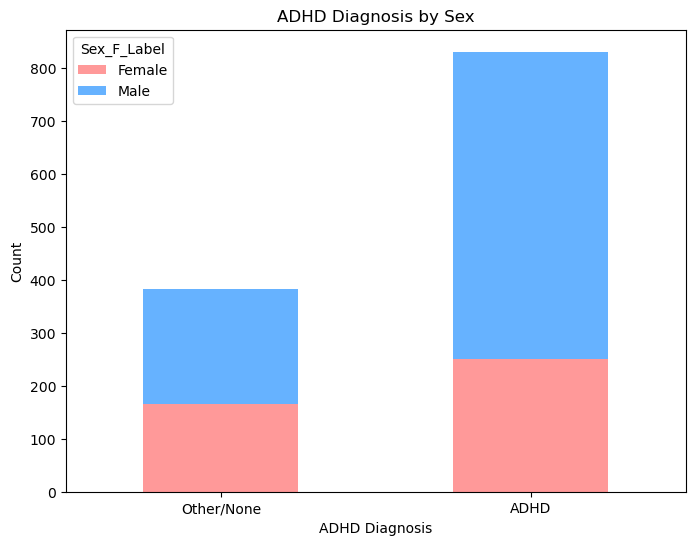

In [131]:
#solutions_df = solutions_df.drop(columns=["participant_id"])
solutions_df['Sex_F_Label'] = solutions_df['Sex_F'].map(categorical_labels['Sex_F'])

adhd_sex_counts = pd.crosstab(solutions_df['ADHD_Outcome'], solutions_df['Sex_F_Label'])
adhd_sex_counts.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], figsize=(8, 6))
plt.title('ADHD Diagnosis by Sex')
plt.ylabel('Count')
plt.xlabel('ADHD Diagnosis')
labels = categorical_labels['ADHD_Outcome'].values()
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()


### Looking for missing values

Using .info() to display the value count for each column. The Non-Null Count column lets us know how many cells are actually filled in so we can see how many missing values there are for each. Many variables/columns in both categorical and quantitative data have blank values, so this will need to be addressed before model training begins.

In [61]:
print("***TRAINING DATA***\n")
print(categorical_df.info())
print(quantitative_df.info())
print("\n")

print("***TESTING DATA***\n")
print(categorical_df_test.info())
print(quantitative_df_test.info())

***TRAINING DATA***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex

### Checking for duplicate values

Checking if there are any duplicate participant IDs in the training and testing datasets. There do not seem to be any, so this won't be a concern for our project.

In [63]:
print("Number of duplicates in quantitative metadata (training): ", quantitative_df.duplicated().sum())
print("Number of duplicates in categorical metadata (training): ", categorical_df.duplicated().sum())
print("Number of duplicates in quantitative metadata (testing): ", quantitative_df_test.duplicated().sum())
print("Number of duplicates in categorical metadata (testing): ", categorical_df_test.duplicated().sum())

Number of duplicates in quantitative metadata (training):  0
Number of duplicates in categorical metadata (training):  0
Number of duplicates in quantitative metadata (testing):  0
Number of duplicates in categorical metadata (testing):  0


### Observing the data's statistics
Using .describe() to see if the quantitative data is skewed or has outliers. First we look at the training quantitative data, then the test quantitative data.

In [65]:
quantitative_df.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [66]:
quantitative_df_test.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,303.000000,295.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,304.000000
mean,59.144488,13.240678,3.321799,13.259516,39.633218,16.726644,15.944637,24.826990,1.890511,11.781022,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,11.206715
std,49.330962,1.986273,0.810248,3.627411,5.153586,3.360000,4.931163,3.283666,1.973000,6.056771,2.139131,4.122804,2.687768,2.821016,3.421676,1.997314,2.084717,3.406516
min,-100.050000,0.000000,2.000000,6.000000,20.000000,7.000000,9.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.007871
25%,50.060000,13.000000,3.000000,11.000000,36.000000,14.000000,12.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,1.000000,0.000000,6.000000,8.558207
50%,73.370000,14.000000,3.000000,13.000000,40.000000,17.000000,15.000000,25.000000,1.000000,11.000000,2.000000,7.000000,4.000000,6.000000,4.000000,1.000000,8.000000,10.246749
75%,93.380000,14.000000,3.000000,16.000000,43.000000,19.000000,19.000000,28.000000,3.000000,16.000000,4.000000,10.750000,6.000000,8.000000,7.000000,3.000000,10.000000,13.406741
max,100.050000,14.000000,8.000000,23.000000,50.000000,27.000000,31.000000,30.000000,10.000000,29.000000,10.000000,18.000000,10.000000,10.000000,15.000000,9.000000,10.000000,21.561943


### Demographics

Using histograms to plot some of the categorical demographic data from the training dataset, including individual's year of enrollment, where they participated in phenotypic testing, and their race and ethnicity. From here we can also observe whether or not the data is skewed.

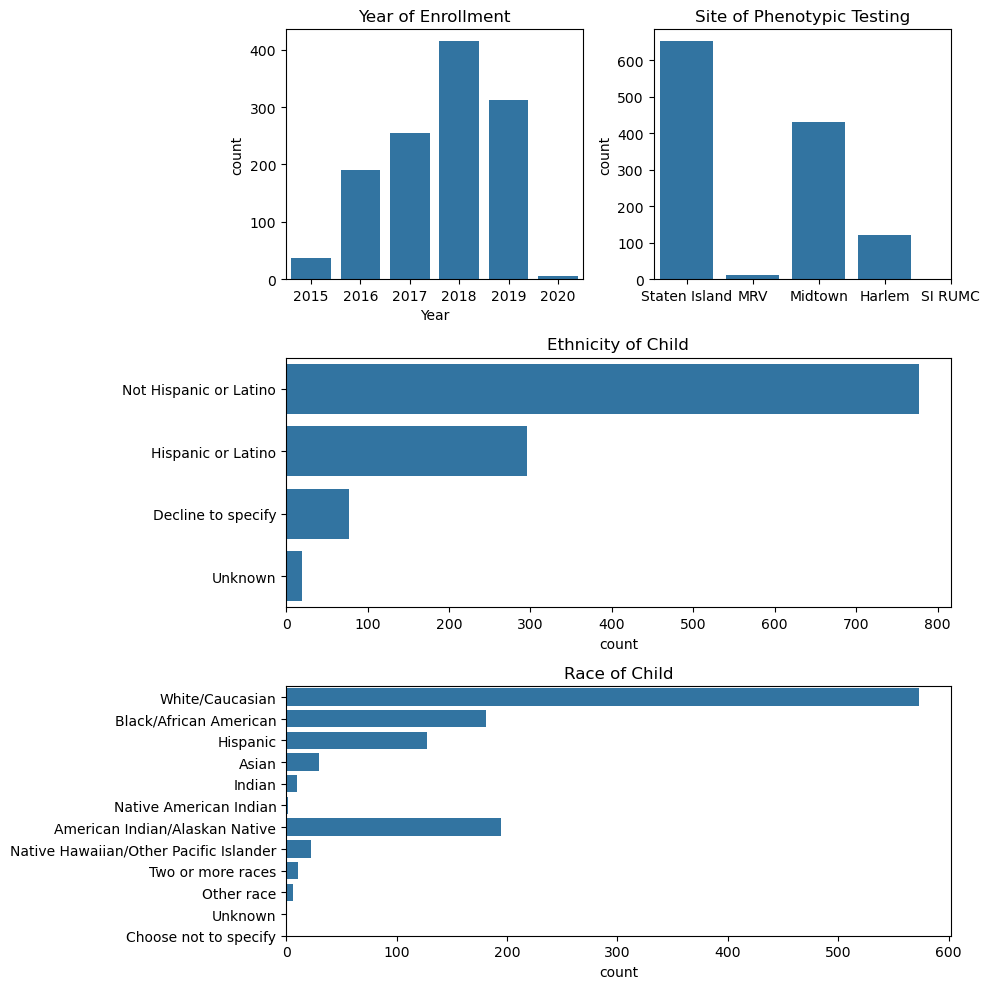

In [68]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(3, 2)

ax = fig.add_subplot(gs[0, 0])
ax.set_title('Year of Enrollment')
sns.countplot(x='Basic_Demos_Enroll_Year', data=categorical_df, ax=ax)
ax.set_xlabel('Year')

ax = fig.add_subplot(gs[0, 1])
ax.set_title('Site of Phenotypic Testing')
sns.countplot(x='Basic_Demos_Study_Site', data=categorical_df, ax=ax)
labels = categorical_labels['Basic_Demos_Study_Site'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

ax = fig.add_subplot(gs[1, 0:2])
ax.set_title('Ethnicity of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Ethnicity', data=categorical_df, ax=ax)
labels = categorical_labels['PreInt_Demos_Fam_Child_Ethnicity'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

ax = fig.add_subplot(gs[2, 0:2])
ax.set_title('Race of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Race', data=categorical_df, ax=ax)
labels = categorical_labels['PreInt_Demos_Fam_Child_Race'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

fig.tight_layout()

### Barratt Simplified Measure of Social Status

Looking at the data for each parent's level of education and their occupations found in the categorical dataframe.

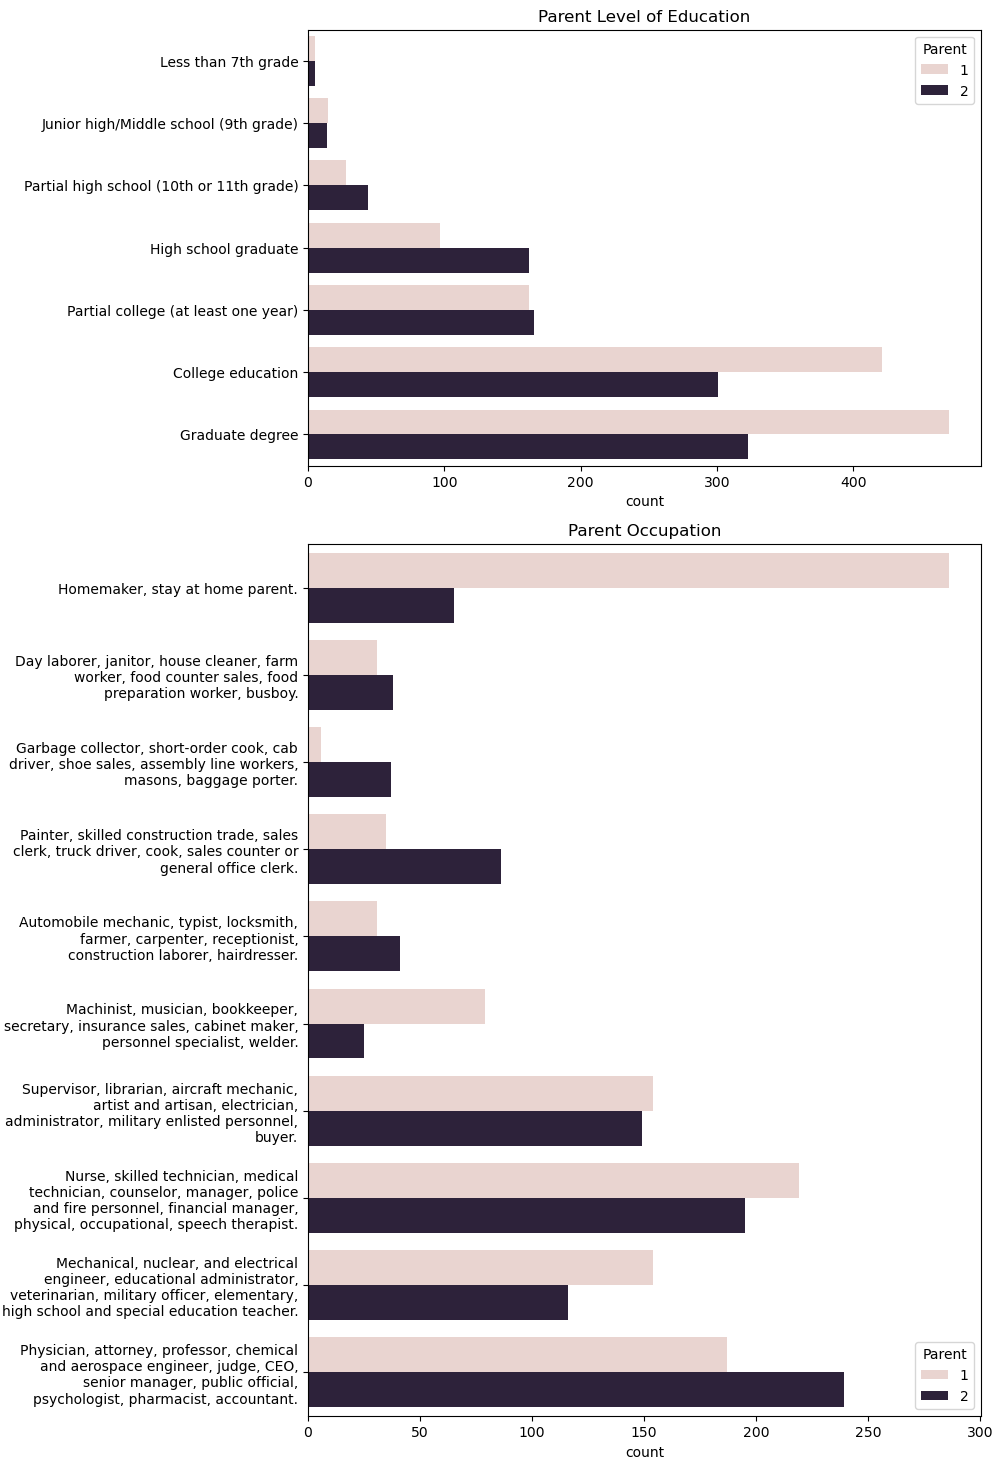

In [70]:
parent_edu_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu'],
    var_name="Parent", value_name="Barratt_Edu"
)

parent_occ_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ'],
    var_name="Parent", value_name="Barratt_Occ"
)

parent_edu_df["Parent"] = parent_edu_df["Parent"].map({"Barratt_Barratt_P1_Edu": 1,"Barratt_Barratt_P2_Edu": 2,})
parent_occ_df["Parent"] = parent_occ_df["Parent"].map({"Barratt_Barratt_P1_Occ": 1, "Barratt_Barratt_P2_Occ": 2})

fig, axes = plt.subplots(2, figsize=(10, 15), height_ratios=[1, 2])
axes = iter(axes)

ax = next(axes)
ax.figure
ax.set_title("Parent Level of Education")
sns.countplot(y='Barratt_Edu', hue='Parent', data=parent_edu_df, ax=ax)
labels = categorical_labels['Barratt_Edu'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

ax = next(axes)
ax.set_title("Parent Occupation")
sns.countplot(y='Barratt_Occ', hue='Parent', data=parent_occ_df, ax=ax)
labels = categorical_labels['Barratt_Occ'].values()
ax.set_yticks(range(len(labels)), labels, wrap=True)
ax.set_ylabel(None)

fig.tight_layout()

### Edinburgh Handedness Questionnaire & Ishihara Color Vision Test

Looking at the child's handedness and color vision test scores. The majority appear to be right-handed and have a high color vision score.

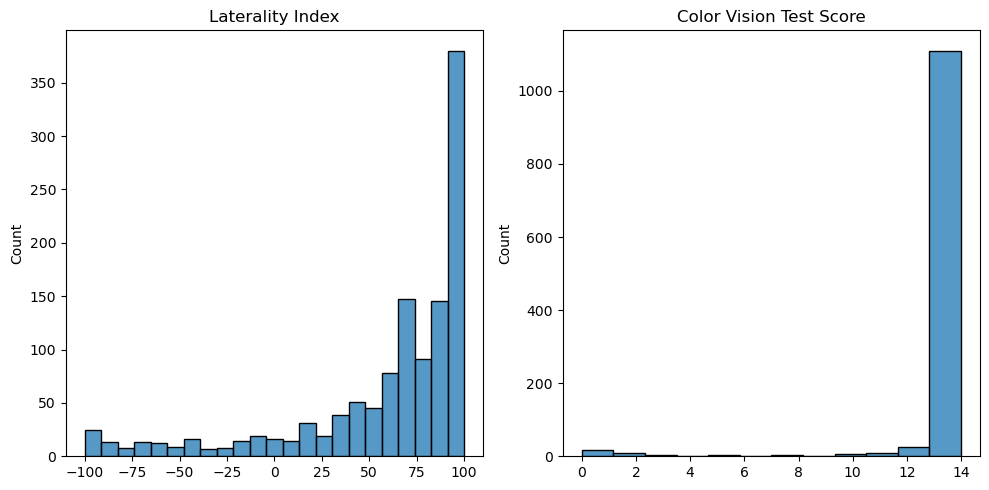

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title('Laterality Index')
sns.histplot(quantitative_df['EHQ_EHQ_Total'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Color Vision Test Score')
sns.histplot(quantitative_df['ColorVision_CV_Score'], ax=ax)
ax.set_xlabel(None)

fig.tight_layout()

### Alabama Parenting Questionnaire - Parent Report
According to Youth Coalition: The APQ measures five dimensions of parenting that are relevant to the etiology and treatment of child externalizing problems: (1) positive involvement with children, (2) supervision and monitoring, (3) use of positive discipline techniques, (4) consistency in the use of such discipline and (5) use of corporal punishment. 

The Positive Parenting Score is skewed to the right, which indicates that most parents reported strong involvement with their kids. Most parents don't seem to use corporeal punishment. Some different parenting styles are observed (supervision score). 

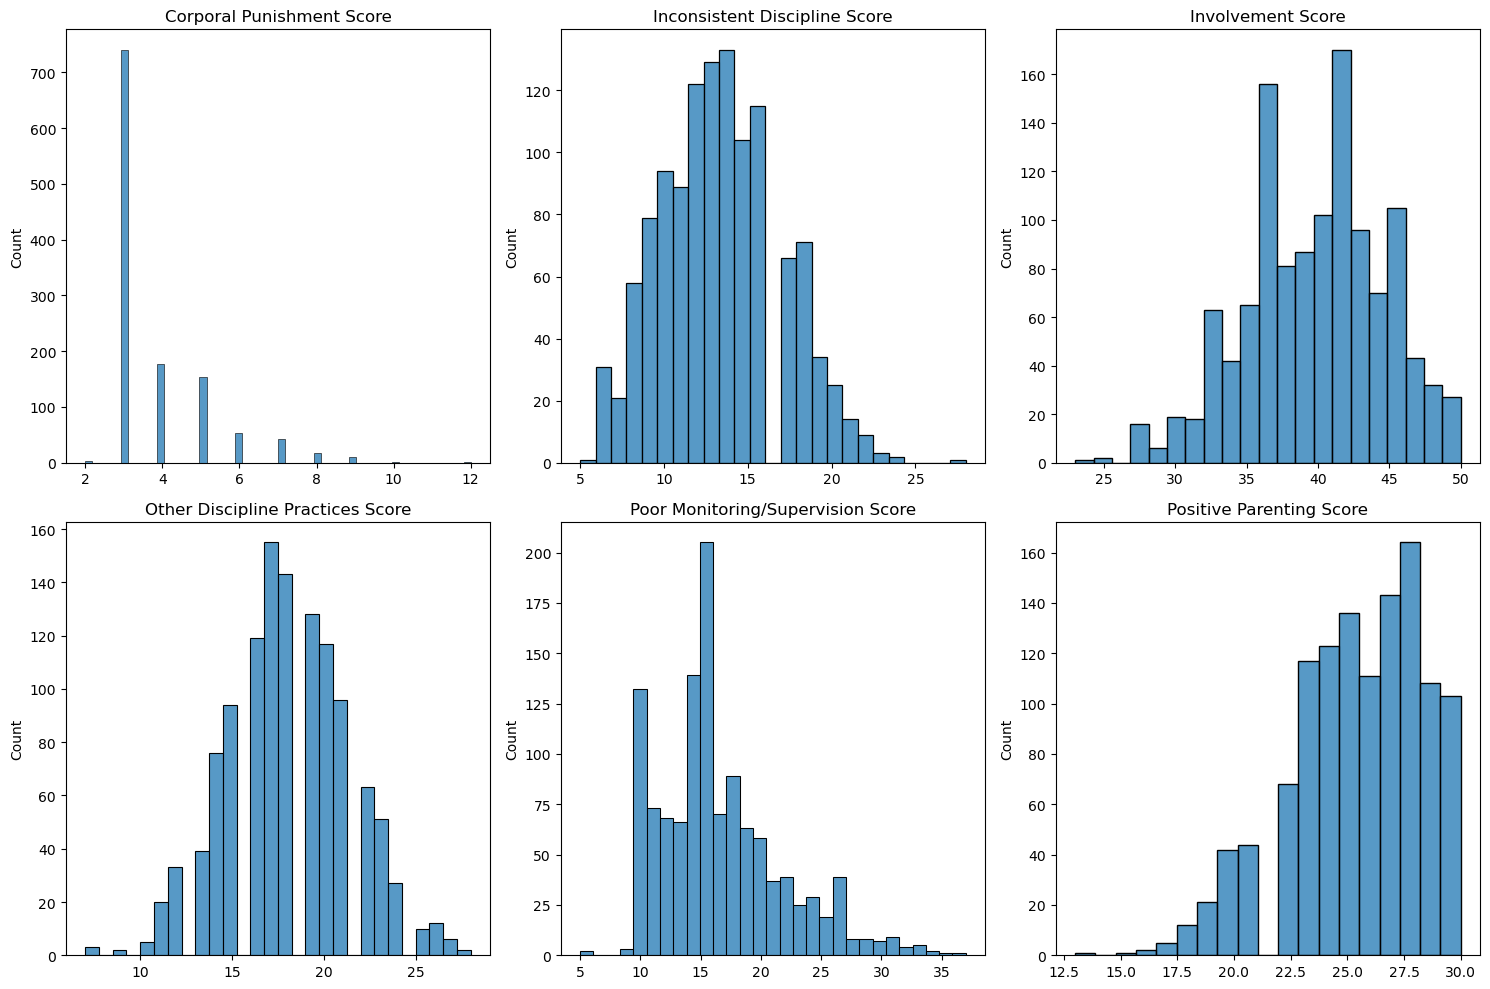

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = iter(axes.flatten())

ax = next(axes)
ax.set_title('Corporal Punishment Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_CP'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Inconsistent Discipline Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_ID'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Involvement Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_INV'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Other Discipline Practices Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_OPD'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Poor Monitoring/Supervision Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_PM'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Positive Parenting Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_PP'], ax=ax)
ax.set_xlabel(None)

fig.tight_layout()

### Strength and Difficulties Questionnaire
The strength and difficulties is a brief behavioral screening tool designed to assess the emotional and behavioral well-being of children and adolescents.

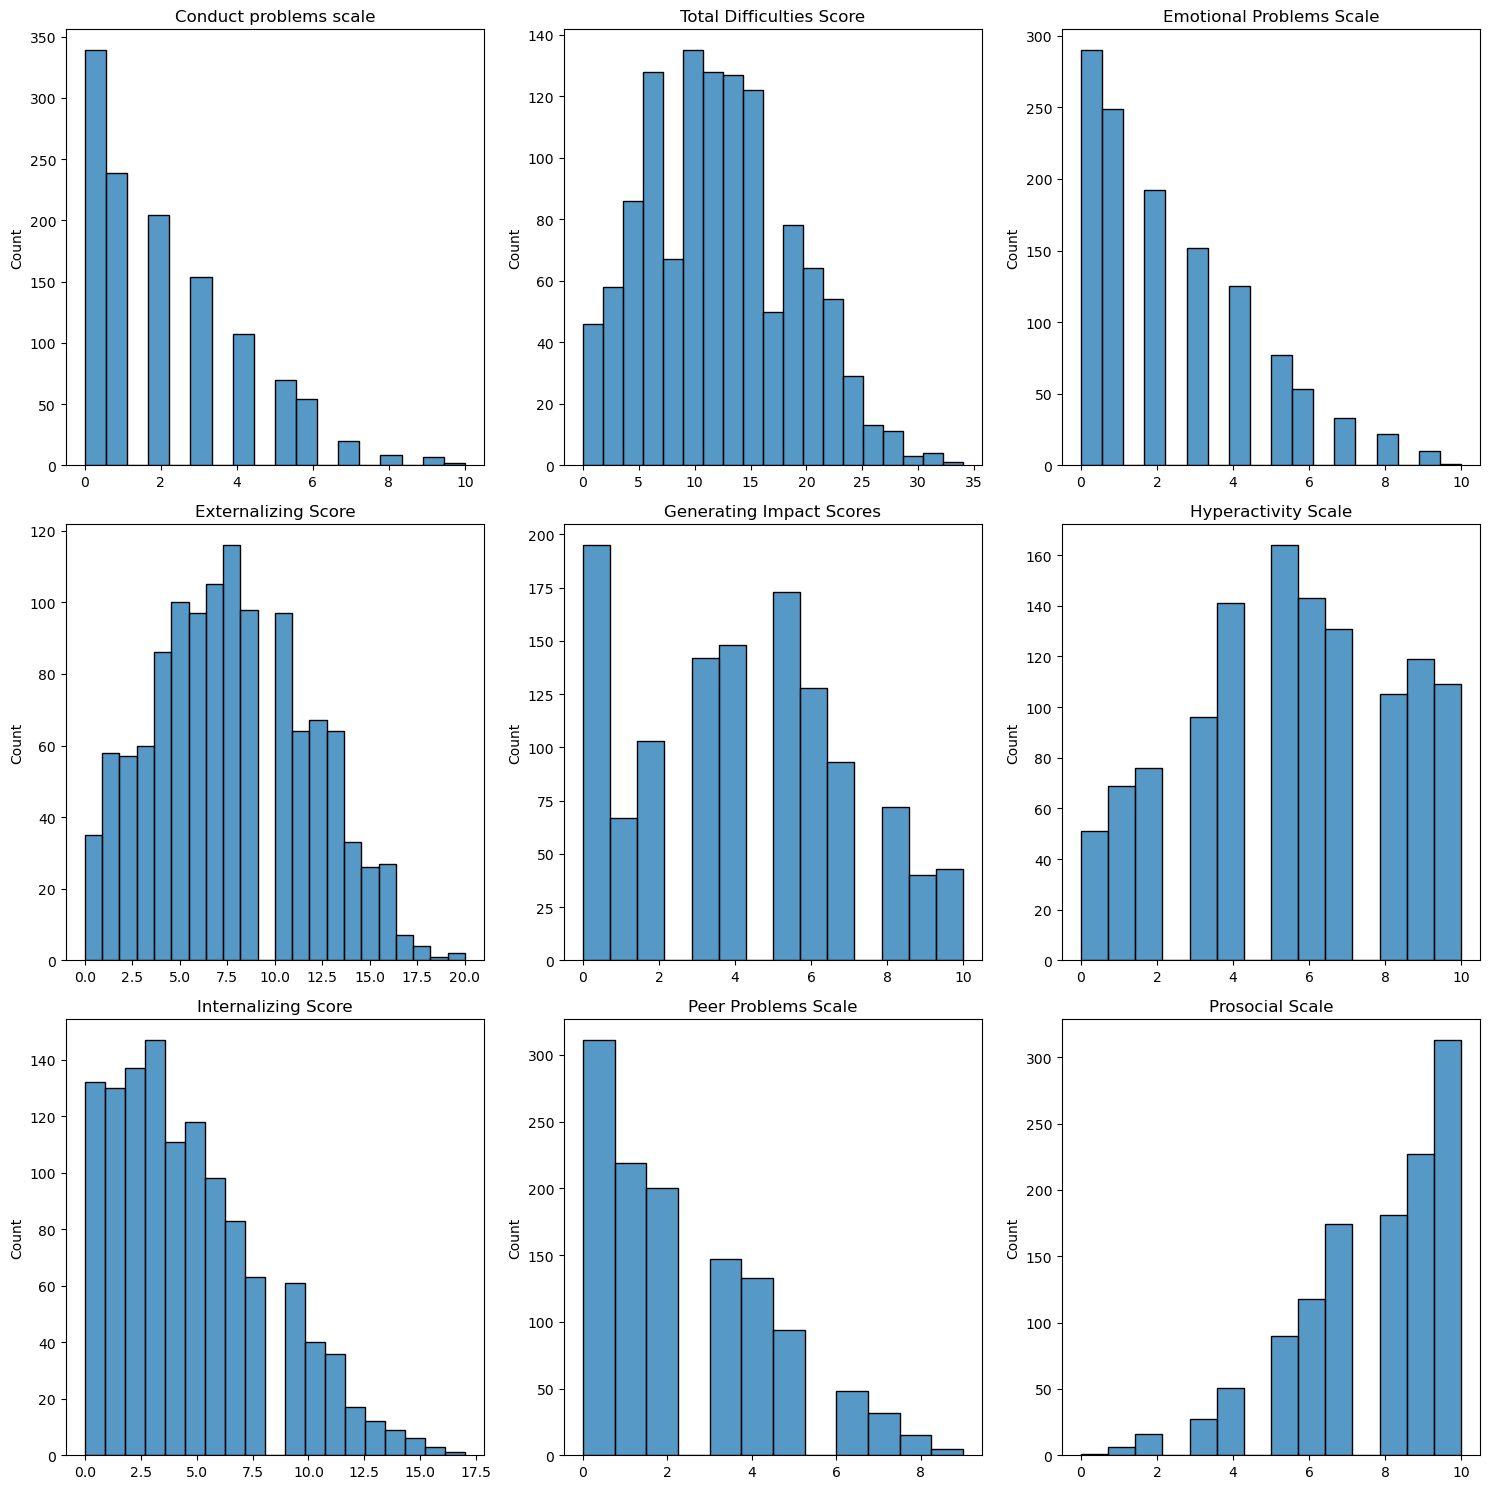

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = iter(axes.flatten())

ax = next(axes)
ax.set_title('Conduct problems scale')
sns.histplot(quantitative_df['SDQ_SDQ_Conduct_Problems'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Total Difficulties Score')
sns.histplot(quantitative_df['SDQ_SDQ_Difficulties_Total'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Emotional Problems Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Emotional_Problems'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Externalizing Score')
sns.histplot(quantitative_df['SDQ_SDQ_Externalizing'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Generating Impact Scores')
sns.histplot(quantitative_df['SDQ_SDQ_Generating_Impact'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Hyperactivity Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Hyperactivity'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Internalizing Score')
sns.histplot(quantitative_df['SDQ_SDQ_Internalizing'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Peer Problems Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Peer_Problems'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Prosocial Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Prosocial'], ax=ax)
ax.set_xlabel(None)

fig.tight_layout()

### Analyzing Feature Importance
We can observe how important certain features are to an ADHD Diagnosis or to identifying a female in our dataset by using correlation matrices.
There does not seem to be any obvious correlation between the Strength and Difficulties data and an ADHD diagnosis. These variables seem to have a strong correlation with each other, but not to an ADHD Diagnosis or identifying if the participant is female or male. The only variables that stand out are the hyperactivity score and the externalizing score for the ADHD_Outcome variable.
There is even less of a correlation between the Alabama Parenting Questionnaire answers and the ADHD diagnosis. All of this would make one question whether or not sociodemographic and emotional factors could have a true positive correlation to an ADHD diagnosis or if they could just lead to misdiagnoses due to biases.


ADHD_Outcome                  1.000000
SDQ_SDQ_Hyperactivity         0.558625
SDQ_SDQ_Externalizing         0.514630
SDQ_SDQ_Difficulties_Total    0.464724
SDQ_SDQ_Generating_Impact     0.410349
SDQ_SDQ_Conduct_Problems      0.275598
SDQ_SDQ_Internalizing         0.257269
SDQ_SDQ_Peer_Problems         0.219253
SDQ_SDQ_Emotional_Problems    0.205459
Sex_F                        -0.130836
SDQ_SDQ_Prosocial            -0.190466
Name: ADHD_Outcome, dtype: float64


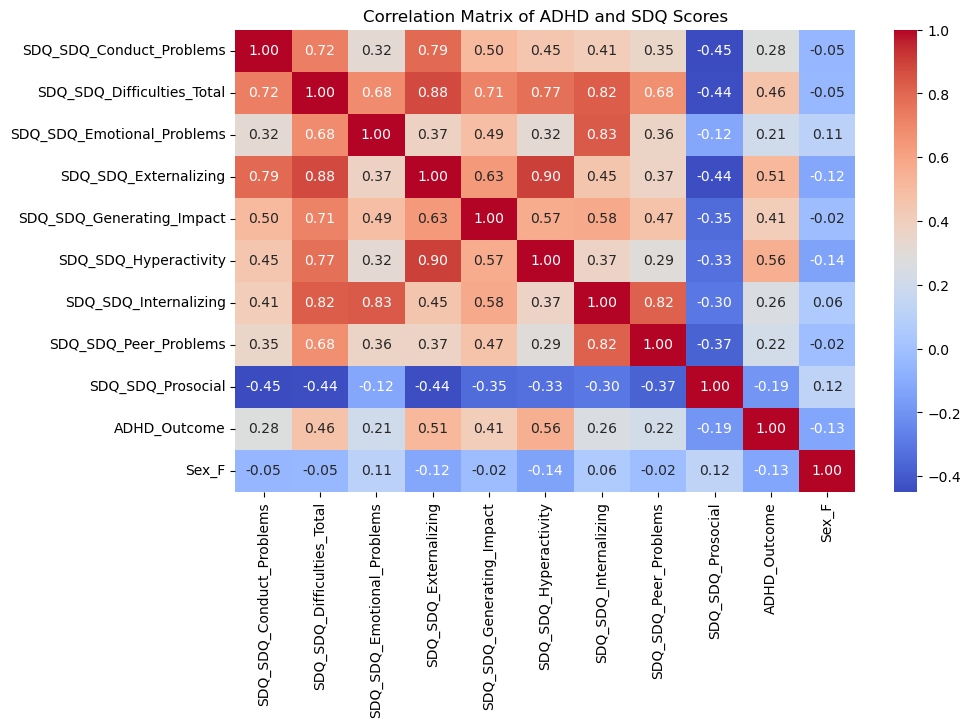

In [135]:
sdq_columns = [col for col in quantitative_df.columns if "sdq" in col.lower()]  
#print(sdq_columns)

sdq_df = quantitative_df[["participant_id"] + sdq_columns]
#sdq_df

sdq_adhd_df = pd.merge(sdq_df, solutions_df, on="participant_id")
droppedcol_df = sdq_adhd_df.drop(columns=["participant_id", "Sex_F_Label"])  # can only create correlation matrix with numerical data, need to drop column with random string of characters that represents participant

correlation_matrix = droppedcol_df.corr()
print(correlation_matrix["ADHD_Outcome"].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of ADHD and SDQ Scores")
plt.show()

['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']
ADHD_Outcome       1.000000
APQ_P_APQ_P_OPD    0.141816
APQ_P_APQ_P_ID     0.124358
APQ_P_APQ_P_CP     0.059494
APQ_P_APQ_P_PM     0.025983
APQ_P_APQ_P_PP    -0.015570
APQ_P_APQ_P_INV   -0.099289
Sex_F             -0.130836
Name: ADHD_Outcome, dtype: float64


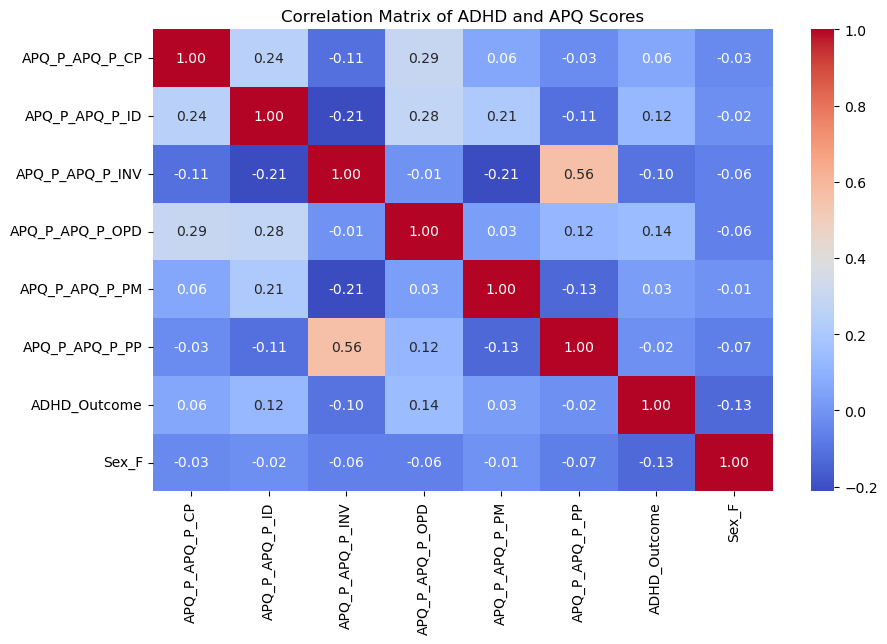

In [139]:
apq_columns = [col for col in quantitative_df.columns if "apq" in col.lower()]  
print(apq_columns)

apq_df = quantitative_df[["participant_id"] + apq_columns]
#sdq_df

apq_adhd_df = pd.merge(apq_df, solutions_df, on="participant_id")
droppedcol_df = apq_adhd_df.drop(columns=["participant_id", "Sex_F_Label"])  # can only create correlation matrix with numerical data, need to drop column with random string of characters that represents participant

correlation_matrix = droppedcol_df.corr()
print(correlation_matrix["ADHD_Outcome"].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of ADHD and APQ Scores")
plt.show()

### MRI Information

Beginning to analyze our MRI information. There are some categorical variables that state where the scanning occurred and the age of the patient at the time of scanning. 

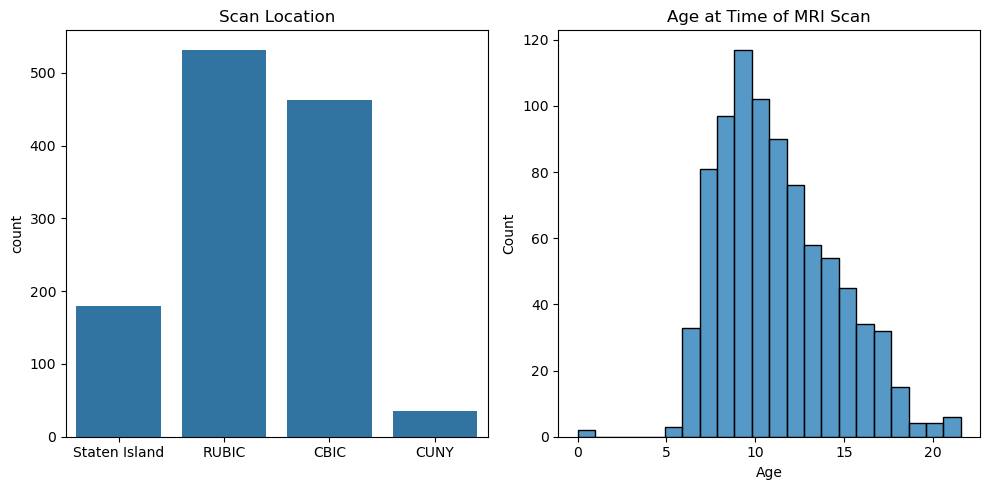

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title('Scan Location')
sns.countplot(x='MRI_Track_Scan_Location', data=categorical_df, ax=ax)
labels = categorical_labels['MRI_Track_Scan_Location'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Age at Time of MRI Scan')
sns.histplot(quantitative_df['MRI_Track_Age_at_Scan'], ax=ax)
ax.set_xlabel("Age")

fig.tight_layout()